Varad Kulkarni

2-D Optical Model for Laser-Assisted Thermoplastic-Automated Fibre Placement

In [20]:
%matplotlib notebook

import math

import sympy as sp

from sympy import Eq

import numpy as np

import matplotlib.pyplot as plt

##Input:

d = 40  # d = float(input('Enter diameter of laser head: '))

a1 = 115  # a1 = float(input('Enter x co-ordinate of the laser head: '))

b1 = 60  # b1 = float(input('Enter y co-ordinate of the laser haed: '))

phid = 10  # phid = float(input('Enter opening angle: '))

thetad = 40.5  # thetad = float(input('Enter angle of incedence: '))

n = 15 # n = float(input('Enter number of rays to analyse: ')) #n has to be an odd number!

k = 50  # n = float(input('Enter radius of consolidation roller: '))

a2 = 120  # n = float(input('Enter x co-ordinate of exit point of tape from placement head: '))

b2 = 110  # n = float(input('Enter y co-ordinate of exit point of tape from placement head: '))

##Converting angles to radians:

theta = math.radians(thetad)

phi = math.radians(phid) 

##Calculating focus point co-ordinates:

a0 = a1 - (d * math.cos(theta)/2 * math.tan(phi))

b0 = b1 - (d * math.sin(theta)/2 * math.tan(phi))

print('Focus Point:',[a0,b0])

##Calculating Tangent point to Roller:

eq1 = sp.Function('eq1')

eq2 = sp.Function('eq2')

p, q = sp.symbols('p q') #(p,q) is the tangent point 

eq1 = Eq(p**2 + (q - k)**2 - k**2, 0) #Equation of circle that (p,q) satisfies 

eq2 = Eq((q - k) * (b2 - q) - p * (p - a2), 0) #Equation developed from slope relation m1 = -1/m2 

l = sp.solve([eq1, eq2], [p, q]) #Tuple in list; 2 tangent points

##Filtering out the required tangent point:

t1 = [] #Empty list to store x co-rdinates of the 2 tangent points

for t in l: #for any element in list l (loop starts from l[0])
    
    t1.append(t[0]) #From 1st tuple in l (t=0), add element \w range 0 into t1. ie; the x co-ordinate -> loop continues

pq = [] #list of final tangent co-ordinates

tgt = list()

tgt.append(max(t1[0], t1[1])) #Store the maximum of the 2 x co-ordinates in pq

t2 = [] 

for t in l: #for any element in list l (loop starts from l[0])
    
    t2.append(t[1]) #From 1st tupple (t=1), add element \w range 1 in t2. ie; the y co-ordinate -> loop continues 
    
tgt.append(min(t2[0], t2[1])) #Store the minimum of the 2 y co-ordinates in pq

p = float(tgt[0])

q = float(tgt[1])

pq = [p,q]

print('Tangent Point:',pq)

##Defining all values of opening angle (phi) based on number of rays (n):

phidiv = list(np.linspace(-phi, phi, n))

##Calculating all normal vectors based on number of rays (n):

nv = np.array([b0, -b0/math.tan(theta)])

#Calculating rotated normal vectors:

anv = []

for angle in phidiv:
    
    mul = np.array([[math.cos(angle), -math.sin(angle)], [math.sin(angle), math.cos(angle)]]) @ nv 
    
    l = list(mul) #converting rotated vector component numpy array to list
    
    anv.append(l) #Adding all rotated normal vectors to new blank list

areq = []

##Defining system of equations for all ray vectors:

eq = sp.Function('eq')

x, y = sp.symbols('x y')

print('\nEqutions of all the rays are:')

for ij in anv:
    
    eq = Eq(ij[0] * (x - a0) + ij[1] * (y - b0), 0) #Point Normal form of equation of a line
    
    display(eq)
    
    areq.append(eq) #Add all equations to a list

## First Incidence Calculations:

tape = sp.Function('tape')

roller = sp.Function('roller')

tape = Eq((b2 - pq[1]) * (x - a2) + (pq[0] - a2) * (y - b2), 0)

roller = Eq(x**2 + (y - k)**2 - k**2, 0)

xieqn = set()

beta = {}

tid={}

for eqn in areq:
    
    t = sp.solve([eqn, tape], [x, y])  # Solving rays and tape
    
    tt = list(dict.values(t))
    
    if tt[0] >= pq[0] and tt[1] > 0 and tt[0] < a2 and tt[1] < b2:
        
        al = {eqn:tt}
        
        tid.update(al)
        
    elif tt[0] < pq[0] and tt[1] > 0:
        
        z = sp.solve([eqn, roller], [x,y])  # Solving rays and roller
        
        alpha = {eqn:z}
        
        beta.update(alpha)  # Adding 'all' solutions to dictionary beta
        
    elif tt[1] < 0:
        
        xieqn.add(eqn)
        
    else:
        
            xieqn.add(eqn)
            
ri = []

rieqn=set()

rol={}
            
for i in beta:
    
    for j in beta[i]:
        
        if type(j[0]) is not sp.core.add.Add or type(j[1]) is not sp.core.add.Add: 
            #sp.core.add.Add is the data type of the complex coordinates obtained after solving rays and roller.   
            
            ri.append(j)
            
            #rieqn.add(i)
            
            ro = {i:''}
            
            rol.update(ro)
            
            #ro.append(ro)
            
        else:
            
            xieqn.add(i) #Appending equations with complex solutions to xieqn

xieqn = list(xieqn)

#Filtering required point of incidence on roller from real coordinates:

s1 = []

#print('ri is',ri)

for s in ri:
    
    s1.append(s[0]) #Appending all x values in s1

itx = iter(s1)

s1m = []

for x in itx:
    
    mx = max(x, next(itx)) #Comparing every 2 x coordinates and - 
    
    s1m.append(mx) #-storing max in s1m

s2 = []

for s in ri: #Same for y coordinate
    
    s2.append(s[1])
    
ity = iter(s2)

s2m = []

for y in ity:
    
    my = max(y, next(ity))
    
    s2m.append(my)

fss = [(x, y) for [x, y] in zip(s1m, s2m)]

for key, value in zip(rol, fss):
    
    rol[key] = list(value)
    
print('Final rol:',rol)

x, y = sp.symbols('x y')

substrate = sp.Function('substrate')

substrate = Eq(y, 0)

sid={}

for i in xieqn:
    
    s = sp.solve([i, substrate], [x, y])
    
    sl = list(dict.values(s))
    
    pa = {i:sl}
    
    sid.update(pa)
    
print('\nSubstrate incidences:',sid.values())

print('\nTape incidences:',tid.values())

print('\nRoller incidences:',rol.values())
display(tape)
display(roller)

Focus Point: [112.31839823946083, 57.70969573021867]
Tangent Point: [37.41649932998122, 16.833668006704226]

Equtions of all the rays are:


Eq(45.0996574293874*x - 76.5640251121118*y - 647.034690516397, 0)

Eq(46.9944337523975*x - 75.4158619781523*y - 926.113077248401, 0)

Eq(48.8599966436641*x - 74.2208176295392*y - 1204.61575875303, 0)

Eq(50.695186402137*x - 72.9796349488594*y - 1482.36960773782, 0)

Eq(52.4988622077983*x - 71.6930854999476*y - 1759.20196241155, 0)

Eq(54.269902830838*x - 70.361969048255*y - 2034.94073381704, 0)

Eq(56.0072073286501*x - 68.987113063686*y - 2309.41451280786, 0)

Eq(57.7096957302187*x - 67.5693722062132*y - 2582.45267660236, 0)

Eq(59.3763097074665*x - 66.1096277945899*y - 2853.885494849, 0)

Eq(61.00601323315*x - 64.6087872584908*y - 3123.54423513682, 0)

Eq(62.5977932248908*x - 63.067783574421*y - 3391.26126788559, 0)

Eq(64.1506601749447*x - 61.487574685744*y - 3656.87017055038, 0)

Eq(65.6636487653149*x - 59.8691429071902*y - 3920.20583107579, 0)

Eq(67.1358184678283*x - 58.2134943142137*y - 4181.1045505356, 0)

Eq(68.5662541288023*x - 56.5216581175808*y - 4439.40414489386, 0)

Final rol: {}

Substrate incidences: dict_values([[33.5093350299358, 0.0], [57.0044043284631, 0.0], [54.1754124734404, 0.0], [51.2005959674729, 0.0], [29.2408355298075, 0.0], [41.2342379304189, 0.0], [59.7013097016098, 0.0], [19.7068674585563, 0.0], [62.2782986184819, 0.0], [24.6544380168155, 0.0], [48.0643796980554, 0.0], [64.7461962345850, 0.0], [37.4966717769896, 0.0], [14.3467761707383, 0.0], [44.7490260332477, 0.0]])

Tape incidences: dict_values([])

Roller incidences: dict_values([])


Eq(93.1663319932958*x - 82.5835006700188*y - 2095.77476549343, 0)

Eq(x**2 + (y - 50)**2 - 2500, 0)

In [21]:
# 1st reflections
import reflections
from reflections import subs_ref_eqns, roller_ref_eqns, it_ref_eqns, to_subs, subs_to_rol_it

subs1_ref = subs_ref_eqns(sid.values(), sid.keys())

rol1_eqns = roller_ref_eqns(rol.values(), rol.keys(), k)

it1_eqns = it_ref_eqns(tid.values(), tid.keys(), a2, b2, pq)

it2subs1_soln = to_subs(it1_eqns) # Reflected from - function name
print('\nFirst reflections; Incoming Tape to Substrate:')
for i in it2subs1_soln:
    display(i)

rol2subs1_soln = to_subs(rol1_eqns)
print('\nFirst reflections; Roller to Substrate:')
for i in rol2subs1_soln:
    display(i)
    
subs2it1_eqns, subs2it1_soln, subs2rol1_eqns, subs2rol1_soln = subs_to_rol_it(subs1_ref, a2, b2, pq, k)
print('\nFirst reflections; Substrate to Incoming Tape:')
for i in subs2it1_soln:
    display(i)
print('\nFirst reflections; Substrate to Roller:')
for i in subs2rol1_soln:
    display(i) 

# 2nd reflections
all_subs1_coords = rol2subs1_soln + it2subs1_soln
all_subs1_eqns = rol1_eqns + it1_eqns

subs2_eqns = subs_ref_eqns(all_subs1_coords, all_subs1_eqns)

rol2_eqns = roller_ref_eqns(subs2rol1_soln, subs2rol1_eqns, k)

it2_eqns = it_ref_eqns(subs2it1_soln, subs2it1_eqns, a2, b2, pq)

it2subs2_soln = to_subs(it2_eqns)
print('\nSecond reflections; Incoming Tape to Substrate:')
for i in it2subs2_soln:
    display(i)

rol2subs2_soln = to_subs(rol2_eqns)
print('\nSecond reflections; Roller to Substrate:')
for i in rol2subs2_soln:
    display(i)
    
subs2it2_eqns, subs2it2_soln, subs2rol2_eqns, subs2rol2_soln = subs_to_rol_it(subs2_eqns, a2, b2, pq, k)
print('\nSecond reflections; Substrate to Incoming Tape:')
for i in subs2it2_soln:
    display(i)
print('\nSecond reflections; Substrate to Roller:')
for i in subs2rol2_soln:
    display(i)
    
#3rd reflections
all_subs2_coords = rol2subs2_soln + it2subs2_soln
all_subs2_eqns = rol2_eqns + it2_eqns

subs3_ref = subs_ref_eqns(all_subs2_coords, all_subs2_eqns)

rol3_eqns = roller_ref_eqns(subs2rol2_soln, subs2rol2_eqns, k)

it3_eqns = it_ref_eqns(subs2it2_soln, subs2it2_eqns, a2, b2, pq)

it2subs3_soln = to_subs(it3_eqns)
print('\nThird reflections; Incoming Tape to Substrate:')
for i in it2subs3_soln:
    display(i)

rol2subs3_soln = to_subs(rol3_eqns)
print('\nThird reflections; Roller to Substrate:')
for i in rol2subs3_soln:
    display(i)
    
subs2it3_eqns, subs2it3_soln, subs2rol3_eqns, subs2rol3_soln = subs_to_rol_it(subs3_ref, a2, b2, pq, k)
print('\nThird reflections; Substrate to Incoming Tape:')
for i in subs2it3_soln:
    display(i)
print('\nThird reflections; Substrate to Roller:')
for i in subs2rol3_soln:
    display(i)


First reflections; Incoming Tape to Substrate:

First reflections; Roller to Substrate:

First reflections; Substrate to Incoming Tape:


[39.0755725619964, 18.7053465657512]

[40.8359296418529, 20.6912881981359]

[42.6056775469185, 22.6878240622016]

[44.3871120086317, 24.6975440805796]


First reflections; Substrate to Roller:


[24.6414623078305, 6.49369775156971]

[37.3222149797558, 16.7276050004679]

[35.5180077098250, 14.8080814912740]

[21.9406351678957, 5.07107247630657]

[29.4329187409084, 9.58090433481864]

[15.6664149073115, 2.51775654045013]

[18.9734968986660, 3.73979663429579]

[33.6103710613930, 12.9818563793985]

[27.1267067631088, 7.99831217452913]

[11.9054175518367, 1.43807012775936]

[31.5872693946622, 11.2412021317864]


Second reflections; Incoming Tape to Substrate:


[63.9943078707002, 0.0]

[69.8812406804141, 0.0]

[76.1952963901437, 0.0]

[82.9934780577237, 0.0]


Second reflections; Roller to Substrate:


[25.2401730017084, 0.0]

[58.2407984555589, 0.0]

[49.7609739500771, 0.0]

[21.6608484847428, 0.0]

[33.1481733944786, 0.0]

[14.6720250033836, 0.0]

[18.1757708294585, 0.0]

[43.1827849274899, 0.0]

[29.0256083663020, 0.0]

[11.0085500778808, 0.0]

[37.7820054118002, 0.0]


Second reflections; Substrate to Incoming Tape:

Second reflections; Substrate to Roller:

Third reflections; Incoming Tape to Substrate:

Third reflections; Roller to Substrate:

Third reflections; Substrate to Incoming Tape:


[41.4329641142863, 21.3648308721433]

[145.534332096470, 138.806481222349]

[62.9039934838951, 45.5873091427090]


Third reflections; Substrate to Roller:


[33.2897437944076, 7.23536944887977]

[21.3955242369049, 4.80894399742338]

[13.8942547754774, 1.96928395043310]

[17.5010958280724, 3.16292446344856]

[45.7080349033247, 11.3499413431902]

[10.3351175462731, 1.07980636480760]

In [22]:
## THERMAL MODEL INPUTS

import thermal_model
from thermal_model import calc_subs_heat_flux, calc_it_heat_flux, calc_roller_heat_flux, export_heat_flux
import pandas as pd

# Contact length of Roller and Incoming-Tape:
c = [0, -k]
c = np.array(c, dtype = np.float64)

d = [pq[0], pq[1] - k]
d = np.array(d, dtype = np.float64)

l33 = np.dot(c,d)

mod_c = np.linalg.norm(c)

mod_d = np.linalg.norm(d)

arc_angle = sp.acos(l33/(mod_c * mod_d))

arc_length = k * arc_angle

print('Contact length of Roller and Incoming Tape is:',arc_length)

# Length of Shadow Regions:
# Substrate:

# subs_x = list()
# for i in rol2subs3_soln:
#     subs_x.append(i[0])

# subs_shadow_point = min(subs_x)

# subs_shadow_length = subs_shadow_point

subs_x0 = list()
for i in sid.values():
    subs_x0.append(i[0])

rol2subs_x1 = list()
for i in rol2subs1_soln:
    rol2subs_x1.append(i[0])

it2subs_x1 = list()
for i in it2subs1_soln:
    it2subs_x1.append(i[0])
    
if not subs_x0 + rol2subs_x1 + it2subs_x1:
    print('No Clear Hits on Substrate')
else:
    subs_shadow_point = min(subs_x0 + rol2subs_x1 + it2subs_x1)
    subs_shadow_length = subs_shadow_point
    
# Roller:

roller_x = list()
roller_y = list()
for i in rol.values():
    roller_x.append(i[0])
    roller_y.append(i[1])

subs2rol1_x = list()
subs2rol1_y = list()
for i in subs2rol1_soln:
    subs2rol1_x.append(i[0])
    subs2rol1_y.append(i[1])
    
if not roller_x + subs2rol1_x and not roller_y + subs2rol1_y:
    roller_shadow_length = ''
    print('No clear hits on Roller')
else:
    roller_shadow_x = min(roller_x + subs2rol1_x)
    roller_shadow_y = min(roller_y + subs2rol1_y)
    roller_shadow_point = (roller_shadow_x, roller_shadow_y)
    e = [0, -k]
    e = np.array(e, dtype = np.float64)
    
    f = [roller_shadow_point[0], roller_shadow_point[1] - k]
    f = np.array(f, dtype = np.float64)
    
    l34 = np.dot(e,f)

    mod_e = np.linalg.norm(e)
    mod_f = np.linalg.norm(f)

    shadow_arc_angle = sp.acos(l34/(mod_e * mod_f))

    roller_shadow_length = k * shadow_arc_angle


# Data Export (Length of Shadow Regions and Contact Length):

with open('Parameters.txt', 'w') as f:
    print('subs_shadow_length',f'"{subs_shadow_length} [mm]"', '"Length of Shadow Region on Substrate"', file = f)
    print('\nroller_shadow_length',f'"{roller_shadow_length} [mm]"', '"Length of Shadow Region on Roller"', file = f)
    print('\narc_length',f'"{arc_length} [mm]"','"Contact Length of Incoming Tape on Roller"', file = f)


## Heat Flux:

# incidence: Substrate
subs0 = list(sid.values())
cd0_subs, subs0_x1, subs0_x2 = calc_subs_heat_flux(1, 120, subs0, n) #(element size, final value, compound list of solution-coordinates)

# incidence: Incoming Tape:
it0 = list(tid.values())
cd0_it, it0_x1, it0_y1, it0_x2, it0_y2 = calc_it_heat_flux(1, it0, a2, b2, pq, n) #(Element length, compound list of solution-coordinates)

# incidence: Roller
rol0 = list(rol.values())
cd0_rol, rol0_x1, rol0_y1, rol0_x2, rol0_y2 = calc_roller_heat_flux(1, rol0, k, arc_length, arc_angle, n) ##(Element length, compound list of solution-coordinates)

# 1st reflection: Incoming Tape to Substrate
cd1_it2subs, it2subs1_x1, it2subs1_x2 = calc_subs_heat_flux(1, 120 , it2subs1_soln, n)

# 1st reflction: Roller to Substrate
cd1_rol2subs, rol2subs1_x1, rol2subs1_x2 = calc_subs_heat_flux(1, 120, rol2subs1_soln, n)

# 1st reflection: Incoming Tape
cd1_it, it1_x1, it1_y1, it1_x2, it1_y2 = calc_it_heat_flux(1, subs2it1_soln, a2, b2, pq, n)

# 1st reflection: Roller
cd1_rol, rol1_x1, rol1_y1, rol1_x2, rol1_y2 = calc_roller_heat_flux(1, subs2rol1_soln, k, arc_length, arc_angle, n)

# # 2nd reflection: Incoming Tape to Substrate
# cd2_it2subs, it2subs2_x1, it2subs2_x2 = calc_subs_heat_flux(1, 5, it2subs2_soln, n)

# # 2nd reflection: Roller to Substrate
# cd2_rol2subs, rol2subs2_x1, rol2subs2_x2 = calc_subs_heat_flux(1, 5, rol2subs2_soln, n)

# # 2nd reflection: Incoming Tape
# cd2_it, it2_x1, it2_y1, it2_x2, it2_y2 = calc_it_heat_flux(1, subs2it2_soln, a2, b2, pq, n)

# # 2nd reflection: Roller
# cd2_rol, rol2_x1, rol2_y1, rol2_x2, rol2_y2 = calc_roller_heat_flux(1, subs2rol2_soln, k, arc_length, arc_angle, n)

# # 3rd reflection: Incoming Tape to Substrate
# cd3_it2subs, it2subs3_x1, it2subs3_x2 = calc_subs_heat_flux(1, 5, it2subs3_soln, n)

# # 3rd reflection: Roller to Substrate
# cd3_rol2subs, rol2subs3_x1, rol2subs3_x2 = calc_subs_heat_flux(1, 5, rol2subs3_soln, n)

# # 3rd reflection: Incoming Tape
# cd3_it, it3_x1, it3_y1, it3_x2, it3_y2 = calc_it_heat_flux(1, subs2it3_soln, a2, b2, pq, n)

# # 3rd reflection: Roller
# cd3_rol, rol3_x1, rol3_y1, rol3_x2, rol3_y2 = calc_roller_heat_flux(1, subs2rol3_soln, k, arc_length, arc_angle, n)


# Data Export (Heat Flux):

# Incidence: Substrate
df_subs0 = pd.DataFrame()
export_heat_flux(df_subs0, subs0_x1, 0, subs0_x2, 0, cd0_subs, 'Substrate_Incidence.csv')

# Incidence: Incoming Tape
df_it0 = pd.DataFrame()
export_heat_flux(df_it0, it0_x1, it0_y1, it0_x2, it0_y2, cd0_it, 'Incoming_Tape_Incidence.csv')

# Incidence: Roller
df_rol0 = pd.DataFrame()
export_heat_flux(df_rol0, rol0_x1, rol0_y1, rol0_x2, rol0_y2, cd0_rol, 'Roller_Incidence.csv')

# 1st Reflection: Incoming Tape to Substrate
df_it2subs1 = pd.DataFrame()
export_heat_flux(df_it2subs1, it2subs1_x1, 0, it2subs1_x2, 0, cd1_it2subs, 'Incoming_Tape_to_Substrate_1st_Reflection.csv')

# 1st Reflection: Roller to Substrate
df_rol2subs1 = pd.DataFrame()
export_heat_flux(df_rol2subs1, rol2subs1_x1, 0, rol2subs1_x2, 0, cd1_rol2subs, 'Roller_to_Substrate_1st_Reflection.csv')

# 1st Reflection: Incoming Tape
df_it1 = pd.DataFrame()
export_heat_flux(df_it1, it1_x1, it1_y1, it1_x2, it1_y2, cd1_it, 'Incoming_Tape_1st_Reflection.csv')

# 1st Reflection: Roller
df_rol1 = pd.DataFrame()
export_heat_flux(df_rol1, rol1_x1, rol1_y1, rol1_x2, rol1_y2, cd1_rol, 'Roller_1st_Reflection.csv')

# # 2nd Reflection: Incoming Tape to Substrate
# df_it2subs2 = pd.DataFrame()
# export_heat_flux(df_it2subs2, it2subs2_x1, 0, it2subs2_x2, 0, cd2_it2subs, 'Incoming_Tape_to_Substrate_2nd_Reflection.csv')

# # 2nd Reflection: Roller to Substrate
# df_rol2subs2 = pd.DataFrame()
# export_heat_flux(df_rol2subs2, rol2subs2_x1, 0, rol2subs2_x2, 0, cd2_rol2subs, 'Roller_to_Substrate_2nd_Reflection.csv')

# # 2nd Reflection: Incoming Tape
# df_it2 = pd.DataFrame()
# export_heat_flux(df_it2, it2_x1, it2_y1, it2_x2, it2_y2, cd2_it, 'Incoming_Tape_2nd_Reflection.csv')
 
# # 2nd Reflection: Roller
# df_rol2 = pd.DataFrame()
# export_heat_flux(df_rol2, rol2_x1, rol2_y1, rol2_x2, rol2_y2, cd2_rol, 'Roller_2nd_Reflection.csv')

# # 3rd Reflection: Incoming Tape to Substrate
# df_it2subs3 = pd.DataFrame()
# export_heat_flux(df_it2subs3, it2subs3_x1, 0, it2subs3_x2, 0, cd3_it2subs, 'Incoming_Tape_to_Substrate_3rd_Reflection.csv')

# # 3rd Reflection: Roller to Substrate
# df_rol2subs3 = pd.DataFrame()
# export_heat_flux(df_rol2subs3, rol2subs3_x1, 0, rol2subs3_x2, 0, cd3_rol2subs, 'Roller_to_Substrate_3rd_Reflection.csv')

# # 3rd Reflection: Incoming Tape
# df_it3 = pd.DataFrame()
# export_heat_flux(df_it3, it3_x1, it3_y1, it3_x2, it3_y2, cd3_it, 'Incoming_Tape_3rd_Reflection.csv')

# # 3rd Reflection: Roller
# df_rol3 = pd.DataFrame()
# export_heat_flux(df_rol3, rol3_x1, rol3_y1, rol3_x2, rol3_y2, cd3_rol, 'Roller_3rd_Reflection.csv')

# df_subs0 = pd.DataFrame({
#             'X1': subs0_x1,
#             'Y1': 0,
#             'X2': subs0_x2,
#             'Y2': 0,
#             'Heat Flux': cd0_subs
#         })
# writer = pd.ExcelWriter('Substrate_Incidence.xlsx', engine = 'xlsxwriter')
# df_subs0.to_excel(writer, sheet_name='Substrate Incidence')
# writer.save()

# Incoming Tape (Incidence)
# df_it0 = pd.DataFrame({
#     'X1': it0_x1,
#     'Y1': it0_y1,
#     'X2': it0_x2,
#     'Y2': it0_y2,
#     'Heat Flux': cd0_it
# })
# writer = pd.ExcelWriter('Incoming_Tape_Incidence.xlsx', engine = 'xlsxwriter')
# df_it0.to_excel(writer, sheet_name = 'Incoming Tape Incidence')
# writer.save()

Contact length of Roller and Incoming Tape is: 42.2770428599861


<IPython.core.display.Javascript object>


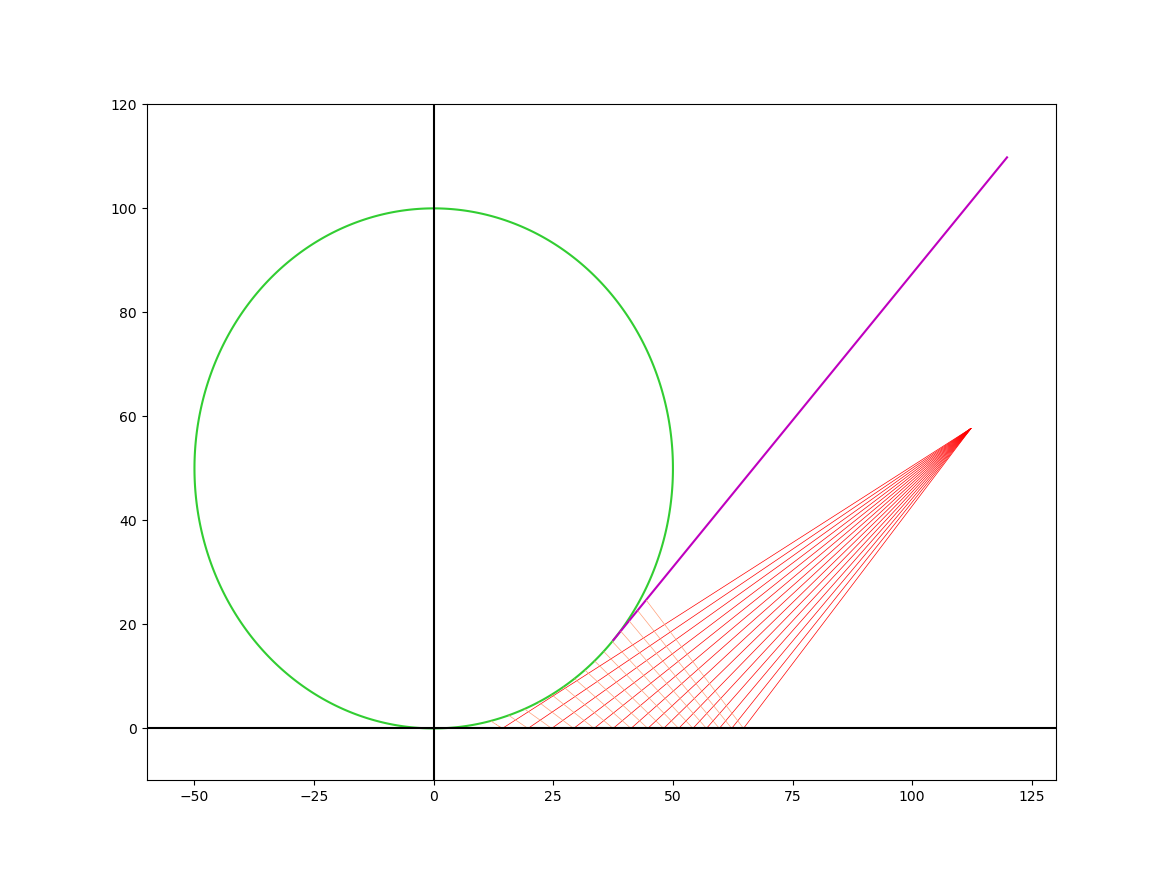

In [23]:
##Plotting:
import reflections
from reflections import plt_incidence, plt_to_subs, plt_from_subs

plt.axhline(color = 'black') #X axis
plt.axvline(color = 'black') #Y Axis

plt.xlim(-(k + 10), a2 + 10)
plt.ylim(-10, b2 + 10)

# ninety = math.radians(90)
# point1 = [a1 - ((d/2) * math.cos(ninety - theta)), b1 + ((d/2) * math.sin(ninety - theta))]
# point2 = [a1 + ((d/2) * math.cos(ninety - theta)), b1 - ((d/2) * math.sin(ninety - theta))]
# x_values = [point1[0], point2[0]]
# y_values = [point1[1], point2[1]]
# plt.plot(x_values, y_values)
    
rx, ry = np.meshgrid(np.arange(-60, 60, 0.05),np.arange(-10, 110, 0.05))
plt.contour(rx, ry, rx**2 + (ry - k)**2 - k**2 , [0], colors = 'limegreen') #Roller
    
itx, ity = np.meshgrid(np.arange(pq[0], a2, 0.05),np.arange(pq[1], b2, 0.05))
plt.contour(itx, ity, (b2 - pq[1]) * (itx - a2) + (pq[0] - a2) * (ity - b2), [0], colors = 'm') #Incoming tape

#Incidence
s0_eqns = list(sid.keys())
plt_incidence(sid.values(), s0_eqns, a0, b0)

it0_eqns = list(tid.keys())
plt_incidence(tid.values(), it0_eqns, a0, b0)

rol0_eqns = list(rol.keys())
plt_incidence(rol.values(), rol0_eqns, a0, b0)

#1st reflection
plt_to_subs(it2subs1_soln, tid.values(), it1_eqns)

plt_to_subs(rol2subs1_soln, rol.values(), rol1_eqns)

all_subs1_soln = subs2rol1_soln + subs2it1_soln
all_subs1_eqns = subs2rol1_eqns + subs2it1_eqns

plt_from_subs(all_subs1_soln, all_subs1_eqns)

#2nd reflection
# plt_to_subs(it2subs2_soln, subs2it1_soln, it2_eqns)

# plt_to_subs(rol2subs2_soln, subs2rol1_soln, rol2_eqns)

# all_subs2_soln = subs2rol2_soln + subs2it2_soln
# all_subs2_eqns = subs2rol2_eqns + subs2it2_eqns

# plt_from_subs(all_subs2_soln, all_subs2_eqns)

#3rd reflection

# plt_to_subs(it2subs3_soln, subs2it2_soln, it3_eqns)

# plt_to_subs(rol2subs3_soln, subs2rol2_soln, rol3_eqns)

# all_subs3_soln = subs2rol3_soln + subs2it3_soln
# all_subs3_eqns = subs2rol3_eqns + subs2it3_eqns

# plt_from_subs(all_subs3_soln, all_subs3_eqns)

#plt.savefig("1.a_30.svg")
#plt.savefig("3.c_18.jpg", dpi = 600)
